## How to explore?
+ Most common words - find these and create word clouds
+ Size of vocabulary - look number of unique words and also how quickly someone speaks
+ Amount of profanity - most common terms

## Steps:
+ Data: determine the format of the raw data to start (document-term matrix)
+ Aggregate: figure out how to aggregate the data
+ Visualize: find the best way to visualize the data
+ Insights: extract some key takeaways from visualizations

## Most common words

In [1]:
import pandas as pd
data = pd.read_pickle('../models/dtm.pkl')
data= data.transpose()
data.head()

,ali,anthony,bill,bo,dave,hasan,jim,joe,john,louis,mike,ricky
aaaaah,0,0,1,0,0,0,0,0,0,0,0,0
aaaaahhhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaaauuugghhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaahhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaah,0,0,0,0,1,0,0,0,0,0,0,0


In [2]:
top_dict = {}
# get top 30 frequent words for each comedian
for comedian in data.columns:
    top_words = data[comedian].sort_values(ascending=False).head(30)
    top_dict[comedian] = list(zip(top_words.index,top_words.values))

from pprint import pprint
pprint(top_dict)

{'ali': [('like', 126),
         ('im', 74),
         ('know', 65),
         ('just', 64),
         ('dont', 61),
         ('thats', 34),
         ('shit', 34),
         ('youre', 31),
         ('gonna', 28),
         ('ok', 26),
         ('lot', 24),
         ('wanna', 21),
         ('oh', 21),
         ('gotta', 21),
         ('husband', 20),
         ('time', 19),
         ('got', 19),
         ('right', 19),
         ('cause', 18),
         ('day', 17),
         ('women', 17),
         ('people', 16),
         ('pregnant', 15),
         ('need', 14),
         ('hes', 14),
         ('god', 14),
         ('tell', 13),
         ('yeah', 13),
         ('theyre', 12),
         ('really', 12)],
 'anthony': [('im', 60),
             ('like', 50),
             ('know', 39),
             ('dont', 38),
             ('joke', 34),
             ('got', 34),
             ('said', 31),
             ('thats', 31),
             ('anthony', 27),
             ('just', 26),
             ('day', 26),
 

In [3]:
# print top 15 words for each comedian
for comedian, top_words in top_dict.items():
    print(comedian)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---------------------------------------------------')
    
# idea: maybe we can add "like" "just" "dont" into stop words

ali
like, im, know, just, dont, thats, shit, youre, gonna, ok, lot, wanna, oh, gotta
---------------------------------------------------
anthony
im, like, know, dont, joke, got, said, thats, anthony, just, day, say, guys, people
---------------------------------------------------
bill
like, just, right, im, know, dont, gonna, got, fucking, yeah, shit, youre, thats, dude
---------------------------------------------------
bo
know, like, im, love, think, just, bo, stuff, repeat, dont, yeah, want, right, cos
---------------------------------------------------
dave
like, know, said, just, im, shit, people, didnt, ahah, dont, time, thats, fuck, fucking
---------------------------------------------------
hasan
like, im, know, dont, dad, youre, just, going, thats, want, got, love, shes, hasan
---------------------------------------------------
jim
like, im, dont, right, fucking, just, went, know, youre, people, thats, day, oh, going
---------------------------------------------------
joe
like

In [4]:
from collections import Counter
# pull out the top 30 words for each comedian
words = []
for comedian in data.columns: # for each comedian
    top = [word for (word, count) in top_dict[comedian]]  # the top 30 words
    for t in top:
        words.append(t)

words

['like',
 'im',
 'know',
 'just',
 'dont',
 'thats',
 'shit',
 'youre',
 'gonna',
 'ok',
 'lot',
 'wanna',
 'oh',
 'gotta',
 'husband',
 'time',
 'got',
 'right',
 'cause',
 'day',
 'women',
 'people',
 'pregnant',
 'need',
 'hes',
 'god',
 'tell',
 'yeah',
 'theyre',
 'really',
 'im',
 'like',
 'know',
 'dont',
 'joke',
 'got',
 'said',
 'thats',
 'anthony',
 'just',
 'day',
 'say',
 'guys',
 'people',
 'tell',
 'youre',
 'grandma',
 'right',
 'time',
 'think',
 'thing',
 'did',
 'good',
 'school',
 'jokes',
 'yeah',
 'ive',
 'okay',
 'gonna',
 'baby',
 'like',
 'just',
 'right',
 'im',
 'know',
 'dont',
 'gonna',
 'got',
 'fucking',
 'yeah',
 'shit',
 'youre',
 'thats',
 'dude',
 'want',
 'fuck',
 'think',
 'people',
 'did',
 'hes',
 'guy',
 'didnt',
 'make',
 'come',
 'thing',
 'going',
 'theyre',
 'let',
 'theres',
 'little',
 'know',
 'like',
 'im',
 'love',
 'think',
 'just',
 'bo',
 'stuff',
 'repeat',
 'dont',
 'yeah',
 'want',
 'right',
 'cos',
 'fucking',
 'eye',
 'said',
 'p

In [5]:
# count each words presence, 12 comedians in all
Counter(words).most_common()

[('like', 12),
 ('im', 12),
 ('know', 12),
 ('just', 12),
 ('dont', 12),
 ('thats', 12),
 ('right', 12),
 ('people', 12),
 ('youre', 11),
 ('got', 10),
 ('time', 9),
 ('gonna', 8),
 ('think', 8),
 ('yeah', 7),
 ('said', 7),
 ('oh', 6),
 ('cause', 6),
 ('hes', 6),
 ('theyre', 6),
 ('really', 6),
 ('say', 6),
 ('fucking', 6),
 ('fuck', 6),
 ('shit', 5),
 ('day', 5),
 ('thing', 5),
 ('good', 5),
 ('want', 5),
 ('didnt', 5),
 ('going', 5),
 ('theres', 5),
 ('did', 4),
 ('little', 4),
 ('ive', 3),
 ('man', 3),
 ('life', 3),
 ('went', 3),
 ('ok', 2),
 ('lot', 2),
 ('gotta', 2),
 ('women', 2),
 ('tell', 2),
 ('joke', 2),
 ('guys', 2),
 ('school', 2),
 ('guy', 2),
 ('make', 2),
 ('come', 2),
 ('love', 2),
 ('dad', 2),
 ('mom', 2),
 ('hey', 2),
 ('white', 2),
 ('goes', 2),
 ('kids', 2),
 ('real', 2),
 ('old', 2),
 ('id', 2),
 ('wanna', 1),
 ('husband', 1),
 ('pregnant', 1),
 ('need', 1),
 ('god', 1),
 ('anthony', 1),
 ('grandma', 1),
 ('jokes', 1),
 ('okay', 1),
 ('baby', 1),
 ('dude', 1),
 ('l

In [6]:
# idea: set the words having count > 12/2 = 6 as stop words
add_stop_words = [word for word, count in Counter(words).most_common() if count>6]
print(add_stop_words)

['like', 'im', 'know', 'just', 'dont', 'thats', 'right', 'people', 'youre', 'got', 'time', 'gonna', 'think', 'yeah', 'said']


In [7]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
data_cleaned = pd.read_pickle('../models/data_cleaned.pkl')  # load corpus
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words) # update stop words list
data_cleaned.head()

,transcript
ali,ladies and gentlemen please welcome to the sta...
anthony,thank you thank you thank you san francisco th...
bill,all right thank you thank you very much thank...
bo,bo what old macdonald had a farm e i e i o and...
dave,this is dave he tells dirty jokes for a living...


In [8]:
# recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_cleaned.transcript)

data_stop = pd.DataFrame(data_cv.toarray(),columns=cv.get_feature_names())
data_stop.index = data_cleaned.index

In [9]:
data_stop.head()

,aaaaah,aaaaahhhhhhh,aaaaauuugghhhhhh,aaaahhhhh,aaah,aah,abc,abcs,ability,abject,...,zee,zen,zeppelin,zero,zillion,zombie,zombies,zoning,zoo,éclair
ali,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
anthony,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bill,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,1,1,1,1,0,0
bo,0,1,1,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
dave,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# pickle it
import pickle
pickle.dump(cv,open('../models/cv_stop.pkl','wb'))
data_stop.to_pickle('../models/dtm.pkl')

In [21]:
# make word clouds
from wordcloud import WordCloud
wc = WordCloud(stopwords=stop_words, background_color='white',colormap='Dark2', max_font_size=50, scale=2)

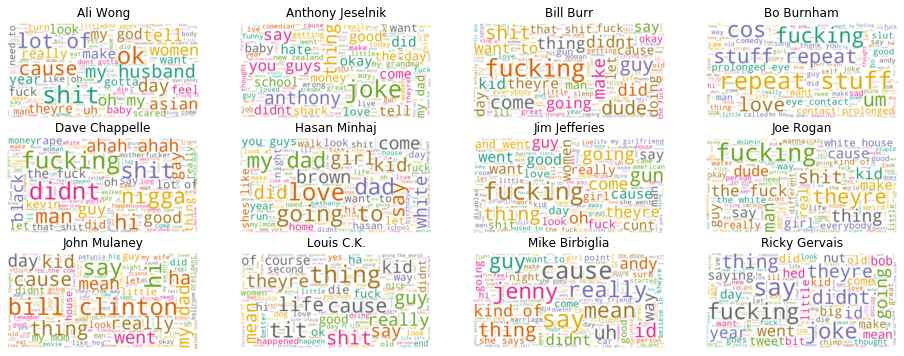

In [22]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 6]
full_names = ['Ali Wong', 'Anthony Jeselnik', 'Bill Burr', 'Bo Burnham', 'Dave Chappelle', 'Hasan Minhaj',
              'Jim Jefferies', 'Joe Rogan', 'John Mulaney', 'Louis C.K.', 'Mike Birbiglia', 'Ricky Gervais']

# subplot for each comedian
for index, comedian in enumerate(data.columns):
    wc.generate(data_cleaned.transcript[comedian])
    plt.subplot(3,4,index+1)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(full_names[index])
    
plt.show()

## Size of vocabulary

In [32]:
# find the nb of unique words that each comedian uses
unique_list = []
for comedian in data.columns:
    uniques = data[comedian].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# create a new DF to store the nb of unique words that each comedian uses
data_words = pd.DataFrame(list(zip(full_names,unique_list)), columns=['comedian','unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,comedian,unique_words
1,Anthony Jeselnik,983
9,Louis C.K.,1098
3,Bo Burnham,1272
6,Jim Jefferies,1313
0,Ali Wong,1341
8,John Mulaney,1389
4,Dave Chappelle,1404
7,Joe Rogan,1435
10,Mike Birbiglia,1494
5,Hasan Minhaj,1559


In [33]:
total_words = []  # total words in each comedian's speech
for comedian in data.columns:
    total = sum(data[comedian])
    total_words.append(total)

print(total_words)

run_times = [60, 59, 80, 60, 67, 73, 77, 63, 62, 58, 76, 79] # speech run times in minutes

data_words['total_words']=total_words
data_words['run_times']=run_times
data_words['words_per_minute']=data_words['total_words']/data_words['run_times']

data_wpm_sort = data_words.sort_values(by='words_per_minute')
data_wpm_sort

[3283, 2905, 5535, 3165, 4094, 4777, 4764, 4579, 4001, 3332, 4741, 4972]


,comedian,unique_words,total_words,run_times,words_per_minute
1,Anthony Jeselnik,983,2905,59,49.237288
3,Bo Burnham,1272,3165,60,52.750000
0,Ali Wong,1341,3283,60,54.716667
9,Louis C.K.,1098,3332,58,57.448276
4,Dave Chappelle,1404,4094,67,61.104478
6,Jim Jefferies,1313,4764,77,61.870130
10,Mike Birbiglia,1494,4741,76,62.381579
11,Ricky Gervais,1633,4972,79,62.936709
8,John Mulaney,1389,4001,62,64.532258
5,Hasan Minhaj,1559,4777,73,65.438356


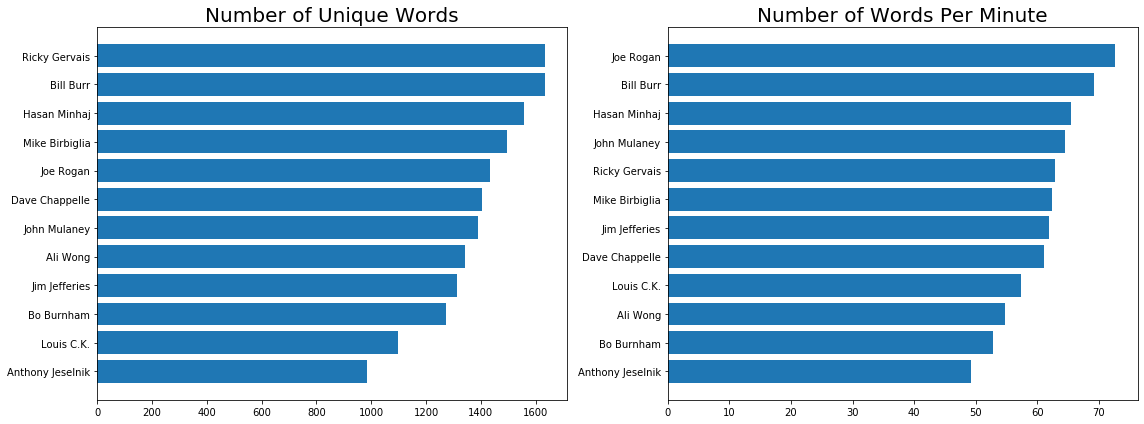

In [34]:
# plot
import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.comedian)
plt.title('Number of Unique Words', fontsize=20)

plt.subplot(1, 2, 2)
plt.barh(y_pos, data_wpm_sort.words_per_minute, align='center')
plt.yticks(y_pos, data_wpm_sort.comedian)
plt.title('Number of Words Per Minute', fontsize=20)

plt.tight_layout()
plt.show()

## Amount of profanity

In [38]:
# find dirty words
data_bad_words = data.transpose()[['fucking', 'fuck', 'shit']]
data_bad_words

,fucking,fuck,shit
ali,5,11,34
anthony,6,9,9
bill,70,36,63
bo,22,15,6
dave,32,33,45
hasan,8,16,15
jim,78,37,20
joe,69,66,40
john,2,2,6
louis,6,15,25


In [39]:
data_bad_words['f-word']= data_bad_words['fuck']+data_bad_words['fucking']
data_bad_words['s-word']= data_bad_words['shit']
data_bad_words.drop(['fuck','fucking','shit'],axis=1,inplace=True)
data_bad_words

,f-word,s-word
ali,16,34
anthony,15,9
bill,106,63
bo,37,6
dave,65,45
hasan,24,15
jim,115,20
joe,135,40
john,4,6
louis,21,25


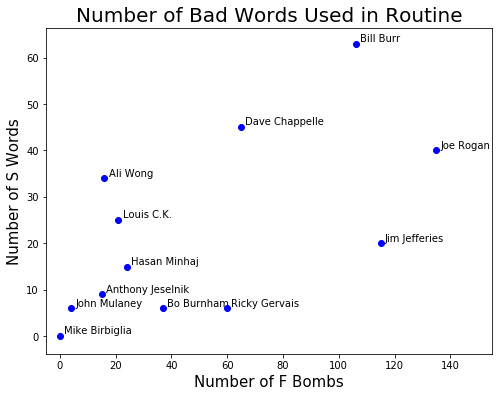

In [45]:
# Let's create a scatter plot of our findings
plt.rcParams['figure.figsize'] = [8, 6]

for i, comedian in enumerate(data_bad_words.index):
#     print(i)
#     print(comedian)
    x = data_bad_words['f-word'].loc[comedian]
    y = data_bad_words['s-word'].loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+1.5, y+0.5, full_names[i], fontsize=10)
    plt.xlim(-5, 155) 
    
plt.title('Number of Bad Words Used in Routine', fontsize=20)
plt.xlabel('Number of F Bombs', fontsize=15)
plt.ylabel('Number of S Words', fontsize=15)

plt.show()